<a href="https://www.kaggle.com/code/mirzaabbasuddin/k-nearest-neighbors-classifier?scriptVersionId=135404251" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

In [2]:
# loading the datasets

df = pd.read_csv('/kaggle/input/fake-bills/fake_bills.csv')
df.head()

,is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length
0,True;171.81;104.86;104.95;4.52;2.89;112.83
1,True;171.46;103.36;103.66;3.77;2.99;113.09
2,True;172.69;104.48;103.5;4.4;2.94;113.16
3,True;171.36;103.91;103.94;3.62;3.01;113.51
4,True;171.73;104.28;103.46;4.04;3.48;112.54


**Data Processing || Dataset Preparing**

In [3]:
# taking column into a list by spliting them
cols = df.columns.str.split(';')
cols

Index([['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']], dtype='object')

In [4]:
df.shape

(1500, 1)

In [5]:
# taking all the rows values into rows list
rows = []
for i in range(df.shape[0]):
    rows.append(df.loc[i].str.split(';').values)

In [6]:
len(rows)

1500

In [7]:
def fill_cols(n):
    lst = []
    for i in range(len(rows)):
        lst.append(rows[i][0][n])
        
    return lst

In [8]:
is_genuine = fill_cols(0)
diagonal = fill_cols(1)
height_left = fill_cols(2)
height_right = fill_cols(3)
margin_low = fill_cols(4)
margin_up = fill_cols(5)
length = fill_cols(6)

In [9]:
# creating a new df

df = pd.DataFrame({'is_genuine':is_genuine,'diagonal':diagonal,'height_left':height_left,'height_right':height_right,'margin_low':margin_low,'margin_up':margin_up,'length':length})
df.head(50)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.5,4.4,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
5,True,172.17,103.74,104.08,4.42,2.95,112.81
6,True,172.34,104.18,103.85,4.58,3.26,112.81
7,True,171.88,103.76,104.08,3.98,2.92,113.08
8,True,172.47,103.92,103.67,4.0,3.25,112.85
9,True,172.47,104.07,104.02,4.04,3.25,113.45


In [10]:
# class column
df['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

**Representing Class By Number Using One Hot Encoding**

In [11]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [12]:
# Apply one-hot encoding to the 'is_genuine' column
df = pd.get_dummies(df, columns=['is_genuine'], drop_first=True)
df

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_True
0,171.81,104.86,104.95,4.52,2.89,112.83,1
1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,172.69,104.48,103.5,4.4,2.94,113.16,1
3,171.36,103.91,103.94,3.62,3.01,113.51,1
4,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28,0
1496,172.19,104.63,104.44,5.27,3.37,110.97,0
1497,171.8,104.01,104.12,5.51,3.36,111.95,0
1498,172.06,104.28,104.06,5.17,3.46,112.25,0


In [13]:
print(df.dtypes)

diagonal           object
height_left        object
height_right       object
margin_low         object
margin_up          object
length             object
is_genuine_True     uint8
dtype: object


In [14]:
# Converting columns to numeric data types
df['diagonal'] = pd.to_numeric(df['diagonal'], errors='coerce')
df['height_left'] = pd.to_numeric(df['height_left'], errors='coerce')
df['height_right'] = pd.to_numeric(df['height_right'], errors='coerce')
df['margin_low'] = pd.to_numeric(df['margin_low'], errors='coerce')
df['margin_up'] = pd.to_numeric(df['margin_up'], errors='coerce')
df['length'] = pd.to_numeric(df['length'], errors='coerce')
df['is_genuine_True'] = pd.to_numeric(df['is_genuine_True'], errors='coerce')

print(df.dtypes)

diagonal           float64
height_left        float64
height_right       float64
margin_low         float64
margin_up          float64
length             float64
is_genuine_True      uint8
dtype: object


**Dealing With Missing Values**

In [15]:
df.isnull().sum()

diagonal            0
height_left         0
height_right        0
margin_low         37
margin_up           0
length              0
is_genuine_True     0
dtype: int64

In [16]:
df['margin_low'].isna().value_counts()

False    1463
True       37
Name: margin_low, dtype: int64

In [17]:
df['margin_low'].fillna(df['margin_low'].mean(),inplace = True)
df['margin_low'].isna().value_counts()

False    1500
Name: margin_low, dtype: int64

**Spliting The Dataset Into Train and Test**

In [18]:
# taking features and class into X and y
X = df.loc[:,'diagonal':'length']
y = df['is_genuine_True']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200, 6)
(300, 6)
(1200,)
(300,)


**Building The KNN Model**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)

In [22]:
#feeding the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [23]:
knn.score(X_test,y_test)

0.98

In [24]:
y_predicted = knn.predict(X_test)

**Generating Confusion Matrix**

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 71,   6],
       [  0, 223]])

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

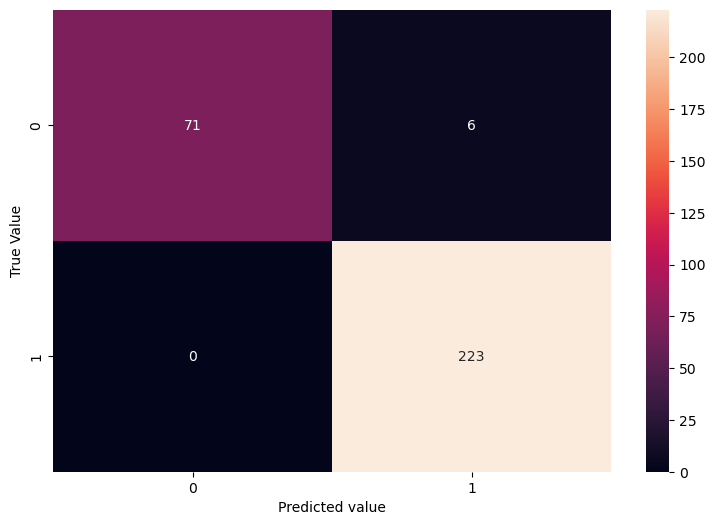

In [27]:
plt.figure(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt='d')  # Use 'd' for regular numeric format
plt.ylabel('True Value')
plt.xlabel('Predicted value')
plt.show()

**Generating Classification Report**

In [28]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        77
           1       0.97      1.00      0.99       223

    accuracy                           0.98       300
   macro avg       0.99      0.96      0.97       300
weighted avg       0.98      0.98      0.98       300



In [29]:
# saving classification_report into a file

with open('/kaggle/working/knn_classification_report.txt', 'w') as f:
    f.write(cr)